<a href="https://colab.research.google.com/github/tylerscott3/CS290/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
df = pd.DataFrame( iris.data, columns = iris.feature_names)

In [16]:
data = load_iris()
X = data.data
y = data.target

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df["species"] = iris.target

In [5]:
target_names = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

df['species_name'] = df['species'].map(target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


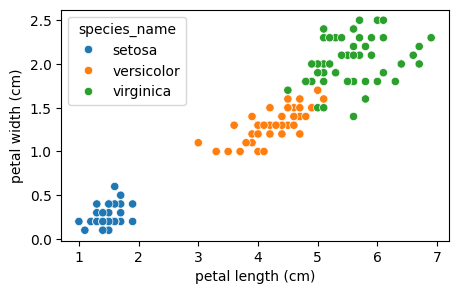

In [6]:
plt.figure(figsize=(5, 3))
sns.scatterplot( x = "petal length (cm)", y = "petal width (cm)", data = df, hue = "species_name");

In [7]:
centroids = df.groupby("species_name")[["petal length (cm)", "petal width (cm)"]].mean()

In [8]:
centroids

,petal length (cm),petal width (cm)
species_name,,
setosa,1.462,0.246
versicolor,4.260,1.326
virginica,5.552,2.026


In [10]:
centroids.loc["versicolor"]

,versicolor
petal length (cm),4.260
petal width (cm),1.326


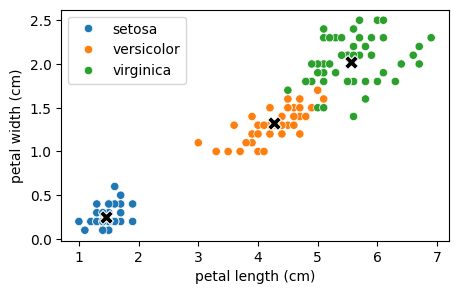

In [11]:
plt.figure(figsize=(5, 3))
sns.scatterplot( x = "petal length (cm)", y = "petal width (cm)", data = df, hue = "species_name")
sns.scatterplot( x = "petal length (cm)", y = "petal width (cm)", data = centroids, c = "black", marker="X", s = 100);

In [12]:
def initialize_centroids(X, k, method="random"):
    if method == "random":
        # Randomly choose k data points as initial centroids
        indices = np.random.choice(X.shape[0], k, replace=False)
        centroids = X[indices]
    elif method == "manual":
        # User can manually specify centroids; here we use a simple example
        # (In practice, this would be a user-defined input)
        centroids = np.array([[5, 3.5, 1.5, 0.2],  # Example for Iris dataset
                               [6, 3.0, 4.5, 1.5],
                               [6.5, 3.0, 5.5, 2.0]])  # Can adjust for different datasets
    return centroids


In [13]:
def kmeans_algorithm(X, k, init_method="random", max_iters=100, tol=1e-4):
    # Initialize centroids
    centroids = initialize_centroids(X, k, method=init_method)
    prev_centroids = np.zeros_like(centroids)

    # Store the iteration history for visualization
    history = []

    for i in range(max_iters):
        # Step 1: Assign each point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 2: Recompute the centroids
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        # Store history for visualization
        history.append((centroids.copy(), labels.copy()))

        # Check for convergence (if centroids don't change significantly)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return centroids, labels, history

In [14]:
def plot_kmeans_history(X, history, title="K-means Clustering"):
    plt.figure(figsize=(8, 6))
    for i, (centroids, labels) in enumerate(history):
        plt.cla()  # Clear axis before each iteration
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, linewidths=3)
        plt.title(f"{title} - Iteration {i + 1}")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

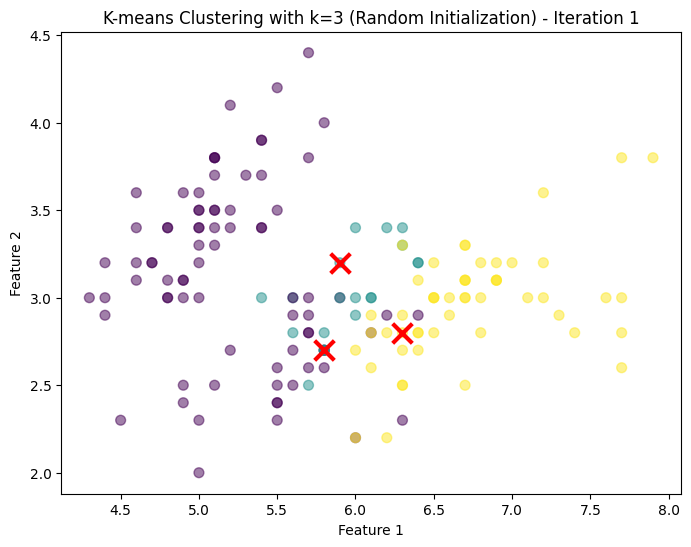

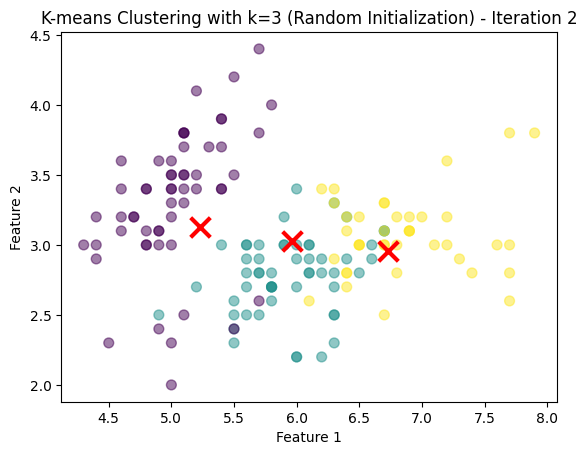

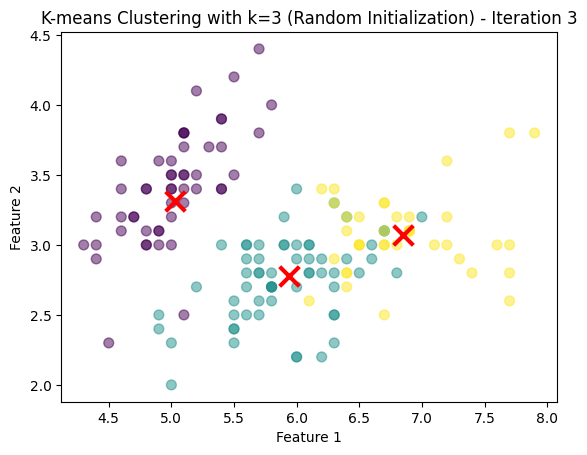

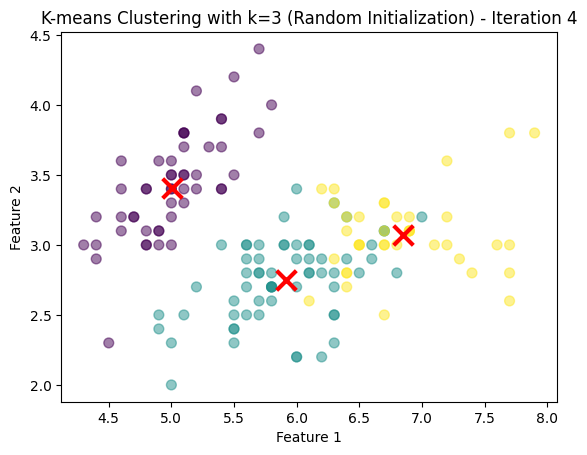

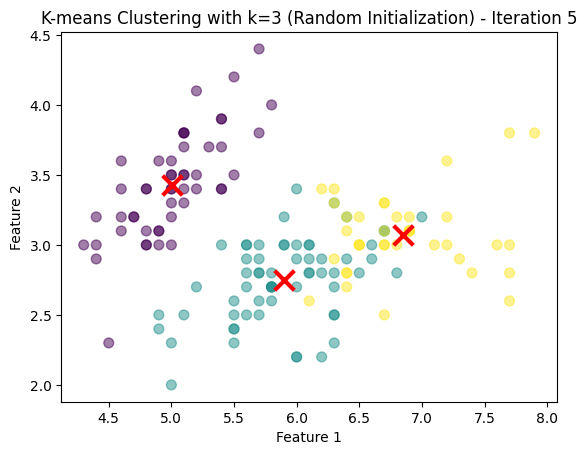

In [17]:
# Experiment with different values of k (e.g., k=3 for Iris dataset)
k = 3
centroids, labels, history = kmeans_algorithm(X, k, init_method="random")

# Visualize the clustering process
plot_kmeans_history(X, history, title=f"K-means Clustering with k={k} (Random Initialization)")

# You can experiment with other values of k and also switch to "manual" initialization.
